### Traffic simulation with OSMnx and UXsim
- [OSMnx](https://www.github.com/gboeing/osmnx)
- [UXsim](https://www.github.com/toruseo/uxsim)

In [1]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import pickle

In [2]:
# Print osmnx version
ox.__version__

'2.0.0b0'

In [3]:
city_name = "Rotterdam"
surrounding_area_name = "South Holland"

- Rotterdam: https://www.keene.edu/campus/maps/tool/?coordinates=4.4990746%2C%2051.9762347%0A4.4782925%2C%2051.9761290%0A4.4496103%2C%2051.9699249%0A4.4198962%2C%2051.9593188%0A4.3244782%2C%2051.9397037%0A4.3090174%2C%2051.9189005%0A4.3074716%2C%2051.8962450%0A4.3203072%2C%2051.8937360%0A4.3354215%2C%2051.8630147%0A4.3500308%2C%2051.8505497%0A4.3707192%2C%2051.8439906%0A4.3919387%2C%2051.8418568%0A4.4114458%2C%2051.8430026%0A4.4589756%2C%2051.8308224%0A4.4948745%2C%2051.8359273%0A4.5239904%2C%2051.8294898%0A4.5493683%2C%2051.8313068%0A4.5780828%2C%2051.8237958%0A4.6195911%2C%2051.8511542%0A4.6459819%2C%2051.8642957%0A4.6339985%2C%2051.8706785%0A4.6194791%2C%2051.8886225%0A4.6422223%2C%2051.8910727%0A4.6477144%2C%2051.9153997%0A4.6208137%2C%2051.9346689%0A4.6365819%2C%2051.9735894%0A4.5975938%2C%2051.9967341%0A4.5212392%2C%2051.9771122%0A4.5005548%2C%2051.9760425%0A4.4990746%2C%2051.9762347
- Area: https://www.keene.edu/campus/maps/tool/?coordinates=4.2076972%2C%2051.7821260%0A4.3827943%2C%2051.7156576%0A4.5242095%2C%2051.6931073%0A4.6896516%2C%2051.7254401%0A4.8042940%2C%2051.7976799%0A4.8071302%2C%2051.8400780%0A4.6883976%2C%2051.9904529%0A4.6516984%2C%2052.0064534%0A4.5631785%2C%2052.0243719%0A4.4703967%2C%2052.0252081%0A4.4060353%2C%2052.0086992%0A4.4013831%2C%2052.0010115%0A4.3067376%2C%2051.9800394%0A4.2597092%2C%2051.9372517%0A4.2076972%2C%2051.7821260

In [4]:
# Coordinates for the polygon
coordinates = [
    (4.4990746, 51.9762347),
    (4.4782925, 51.9761290),
    (4.4496103, 51.9699249),
    (4.4198962, 51.9593188),
    (4.3244782, 51.9397037),
    (4.3090174, 51.9189005),
    (4.3074716, 51.8962450),
    (4.3203072, 51.8937360),
    (4.3354215, 51.8630147),
    (4.3500308, 51.8505497),
    (4.3707192, 51.8439906),
    (4.3919387, 51.8418568),
    (4.4114458, 51.8430026),
    (4.4589756, 51.8308224),
    (4.4948745, 51.8359273),
    (4.5239904, 51.8294898),
    (4.5493683, 51.8313068),
    (4.5780828, 51.8237958),
    (4.6195911, 51.8511542),
    (4.6459819, 51.8642957),
    (4.6339985, 51.8706785),
    (4.6194791, 51.8886225),
    (4.6422223, 51.8910727),
    (4.6477144, 51.9153997),
    (4.6208137, 51.9346689),
    (4.6365819, 51.9735894),
    (4.5975938, 51.9967341),
    (4.5212392, 51.9771122),
    (4.5005548, 51.9760425),
    (4.4990746, 51.9762347)
]

# Creating a Polygon object
city_polygon = Polygon(coordinates)

coordinates = [
    (4.2076972, 51.7821260),
    (4.3827943, 51.7156576),
    (4.5242095, 51.6931073),
    (4.6896516, 51.7254401),
    (4.8042940, 51.7976799),
    (4.8071302, 51.8400780),
    (4.6883976, 51.9904529),
    (4.6516984, 52.0064534),
    (4.5631785, 52.0243719),
    (4.4703967, 52.0252081),
    (4.4060353, 52.0086992),
    (4.4013831, 52.0010115),
    (4.3067376, 51.9800394),
    (4.2597092, 51.9372517),
    (4.2076972, 51.7821260)
]

# Creating a Polygon object
area_polygon = Polygon(coordinates)

# Save as pickles
with open("../data/polygons.pkl", "wb") as f:
    pickle.dump((city_polygon, area_polygon), f)

In [5]:
redownload = True

if redownload:
    # Define the custom filters
    high_custom_filter = (
        '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|'
        'secondary|secondary_link|tertiary|tertiary_link"]'
    )
    low_custom_filter = (
        '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link"]'
    )
    
    # Download the network for city with high density filter
    # Note: buffer_dist will be removed in geopandas 2.0 https://github.com/gboeing/osmnx/pull/1044
    # city_network = ox.graph_from_place(f'{city_name}, South Holland, Netherlands', network_type="drive", simplify=False, custom_filter=high_custom_filter, buffer_dist=1000)
    city_network = ox.graph_from_polygon(city_polygon, network_type="drive", simplify=False, custom_filter=high_custom_filter)

    print(f"{city_network} network has", len(city_network.nodes), "nodes and", len(city_network.edges), "edges")
    # Download the network for the province of South-Holland with low density filter
    # surrounding_area_network = ox.graph_from_place(f'{surrounding_area_name}, Netherlands', network_type="drive", simplify=False, custom_filter=low_custom_filter)
    surrounding_area_network = ox.graph_from_polygon(area_polygon, network_type="drive", simplify=False, custom_filter=low_custom_filter)

    print(f"{surrounding_area_name} network has", len(surrounding_area_network.nodes), "nodes and", len(surrounding_area_network.edges), "edges")
    
    # Save both as pickle
    ox.save_graphml(city_network, filepath="graphs/city_network.graphml")
    ox.save_graphml(surrounding_area_network, filepath="graphs/surrounding_area_network.graphml")

else:
    # Load the networks from the saved files
    city_network = ox.load_graphml(filepath="graphs/city_network.graphml")
    surrounding_area_network = ox.load_graphml(filepath="graphs/surrounding_area_network.graphml")

MultiDiGraph with 42917 nodes and 54391 edges network has 42917 nodes and 54391 edges
South Holland network has 46047 nodes and 54075 edges


In [6]:
# Project the networks to a unified CRS (Coordinate Reference System)
city_network = ox.project_graph(city_network)
surrounding_area_network = ox.project_graph(surrounding_area_network)

In [7]:
# Add an attribute to nodes and edges indicating the network name
for node in city_network.nodes:
    city_network.nodes[node]["network"] = city_name
for edge in city_network.edges:
    city_network.edges[edge]["network"] = city_name
for node in surrounding_area_network.nodes:
    surrounding_area_network.nodes[node]["network"] = surrounding_area_name
for edge in surrounding_area_network.edges:
    surrounding_area_network.edges[edge]["network"] = surrounding_area_name

In [8]:
print(f"{city_name} network has", len(city_network.nodes), "nodes and", len(city_network.edges), "edges")
print(f"{surrounding_area_name} network has", len(surrounding_area_network.nodes), "nodes and", len(surrounding_area_network.edges), "edges")

print(f"In total, the networks have {len(city_network.nodes) + len(surrounding_area_network.nodes)} nodes and {len(city_network.edges) + len(surrounding_area_network.edges)} edges")

Rotterdam network has 42917 nodes and 54391 edges
South Holland network has 46047 nodes and 54075 edges
In total, the networks have 88964 nodes and 108466 edges


In [9]:
# give all the edges in city network a "merge" that equals the maxspeed
for u, v, data in city_network.edges(data=True):
    data["merge"] = data.get("maxspeed", 50)
# give all the edges in South Holland network a "merge" that equals True
for u, v, data in surrounding_area_network.edges(data=True):
    data["merge"] = True

In [10]:
# Combine the networks. The order of the networks in the `compose` function matters here.
merged_network = nx.compose(surrounding_area_network, city_network)
print("The combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The combined network has 63471 nodes and 80349 edges


In [11]:
# Add speed limits and travel times to the edges
merged_network = ox.add_edge_speeds(merged_network)
merged_network = ox.add_edge_travel_times(merged_network)

In [12]:
# Create a dict mapping node ids to tolerances: 10 if part of the city network, 50 if part of the surrounding area network
tolerance_dict = {node: 10 if data["network"] == city_name else 50 for node, data in merged_network.nodes(data=True)}

In [13]:
# Consolidate intersections
merged_network = ox.consolidate_intersections(merged_network, tolerance=tolerance_dict, rebuild_graph=True)
print("The simplified combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The simplified combined network has 14273 nodes and 19934 edges


In [14]:
# Simplify the networks
merged_network = ox.simplify_graph(merged_network)
print("The simplified combined network has", len(merged_network.nodes), "nodes and", len(merged_network.edges), "edges")

The simplified combined network has 1226 nodes and 2836 edges


In [15]:
# Save the combined network as a pickle file
ox.save_graphml(merged_network, filepath="graphs/merged_network.graphml")
print("The combined network has been saved in graphs as merged_network.graphml")

The combined network has been saved in graphs as merged_network.graphml


In [16]:
color_map = {city_name: 'red', surrounding_area_name: 'blue'}
edge_network = [merged_network.edges[edge]['network'] for edge in merged_network.edges]
# If any of the elements is a list, take the first element
edge_network = [item if not isinstance(item, list) else surrounding_area_name for item in edge_network]
edge_colors = [color_map[edge] for edge in edge_network]

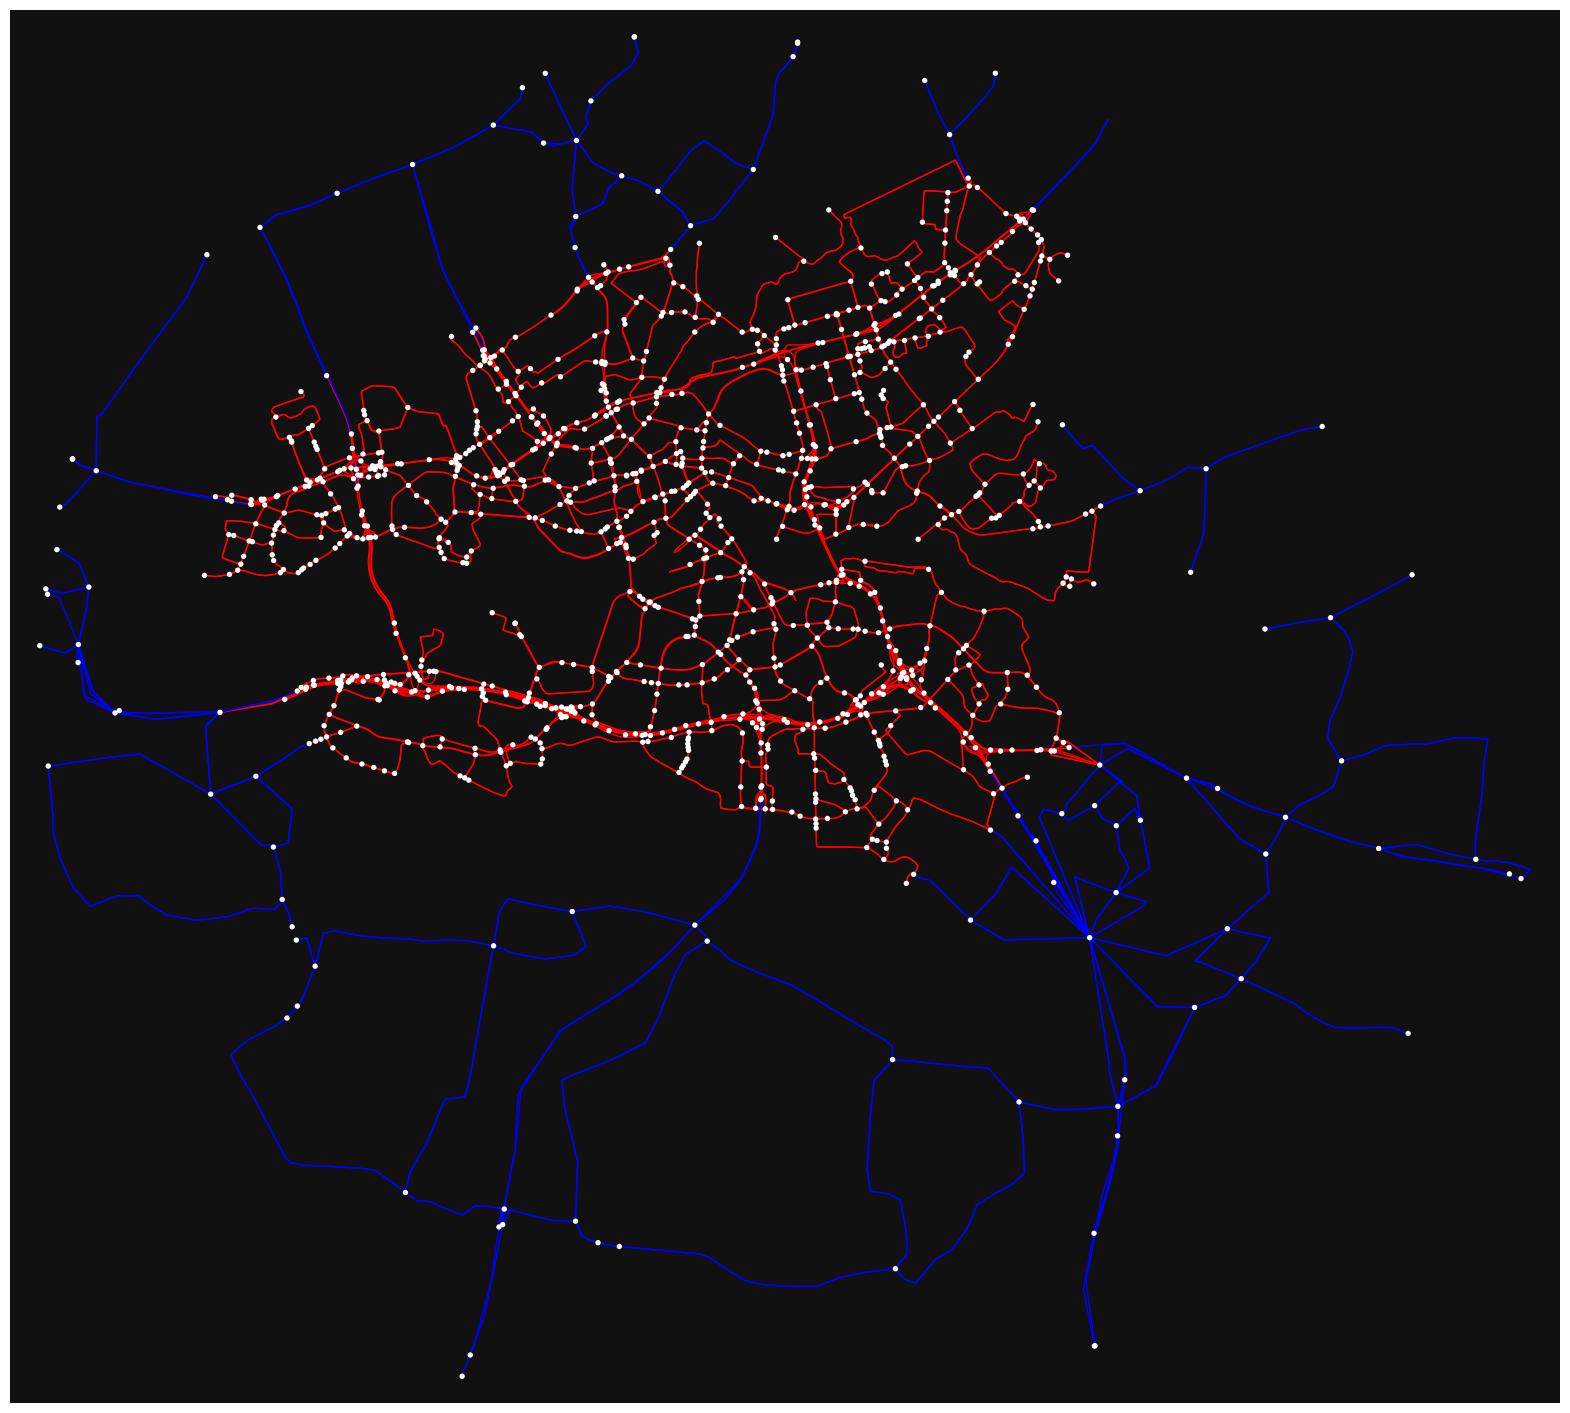

In [17]:
# The simplified_combined_network is now ready for further analysis or visualization
# Color edges based on the "network" attribute
fig, ax = ox.plot_graph(merged_network, edge_color=edge_colors, figsize=(20,20))

# Save the plot as a PNG file
fig.savefig("../img/merged_network.png", dpi=200, bbox_inches="tight")

In [18]:
nodes = ox.graph_to_gdfs(merged_network, edges=False)
nodes

,osmid_original,x,y,cluster,highway,railway,network,street_count,ref,junction,geometry
osmid,,,,,,,,,,,
0,"[29435861, 44234835, 300460494, 44235910, 8889...",606925.694842,5.749450e+06,0.0,crossing,tram_level_crossing,Rotterdam,5,NaN,NaN,POINT (606925.695 5749449.558)
2,"[29585064, 3994263462, 44265337, 3994263460, 4...",601405.037383,5.749981e+06,2.0,"[traffic_signals, crossing]",NaN,Rotterdam,7,NaN,NaN,POINT (601405.037 5749981.348)
5,"[29623740, 4001426811, 44380371, 4001426808, 4...",601351.353152,5.752759e+06,5.0,"[traffic_signals, crossing]",tram_level_crossing,Rotterdam,6,NaN,NaN,POINT (601351.353 5752758.852)
6,"[34598955, 2406819084, 35270567, 2406819083, 4...",590147.875174,5.745174e+06,6.0,"[traffic_signals, give_way, crossing]",NaN,South Holland,5,NaN,NaN,POINT (590147.875 5745173.984)
11,8783244579,613051.922929,5.730872e+06,NaN,NaN,NaN,South Holland,2,NaN,NaN,POINT (613051.923 5730871.855)
...,...,...,...,...,...,...,...,...,...,...,...
13993,"[5147967217, 5511381786]",590634.976066,5.750870e+06,13993.0,NaN,NaN,Rotterdam,3,NaN,NaN,POINT (590634.976 5750869.835)
14029,"[5513956168, 5513956169, 7214507153, 551395617...",593743.478999,5.753892e+06,14029.0,NaN,NaN,Rotterdam,3,NaN,NaN,POINT (593743.479 5753891.774)
14041,5735336165,597020.858724,5.757255e+06,NaN,NaN,NaN,Rotterdam,2,NaN,NaN,POINT (597020.859 5757254.998)


### Add population data to the nodes

In [19]:
# Load data/population_data_pc4.pkl geodataframe
population_data = pd.read_pickle("../data/population_data_pc4.pkl")
population_data.head(3)

,postcode,aantal_inwoners,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,stedelijkheid,geometry,area,pop_density
0,1011,9760,710,1180,3375,2580,1915,1,"MULTIPOLYGON (((121972.81 486565.256, 121967.6...",1.022319,9546.917698
1,1012,8800,370,1690,4250,1725,770,1,"MULTIPOLYGON (((121322.858 486672.12, 121254.3...",1.184896,7426.812454
2,1013,21940,2310,2415,7875,5940,3395,1,"MULTIPOLYGON (((121399.335 488004.302, 121384....",4.746901,4621.962781


In [20]:
# Get the current CRS of the merged_network
merged_network.graph["crs"]

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Step 1: Extract node coordinates and attributes
nodes_data = [{'id': node, 'geometry': Point(data['x'], data['y'])} 
              for node, data in merged_network.nodes(data=True)]

# Step 2: Create a DataFrame from the nodes data
nodes_df = pd.DataFrame(nodes_data)

# Step 3: Convert the DataFrame to a GeoDataFrame
# Make sure to specify the correct CRS for your data
nodes_gdf = gpd.GeoDataFrame(nodes_df, geometry='geometry', crs=population_data.crs)

nodes_gdf.head(3)  # This will display the first few rows of your new GeoDataFrame

,id,geometry
0,0,POINT (606925.695 5749449.558)
1,2,POINT (601405.037 5749981.348)
2,5,POINT (601351.353 5752758.852)


In [22]:
# Step 0: Set the correct CRS for nodes_gdf based on merged_network's CRS information
# Assuming merged_network.graph['crs'] is in a format compatible with GeoPandas
nodes_gdf.crs = "EPSG:32631"  # This corresponds to WGS 84 / UTM zone 31N

# Step 1: Reproject nodes_gdf to match the CRS of population_data (EPSG:28992)
nodes_gdf = nodes_gdf.to_crs(population_data.crs)

# Now, proceed with the Spatial Join and Distribution steps as previously outlined

# Spatial Join
nodes_with_population = gpd.sjoin(nodes_gdf, population_data, how='left', predicate='within')

# Count the number of nodes per postcode
nodes_with_population['nodes_per_postcode'] = nodes_with_population.groupby('postcode')['postcode'].transform('count')

# Distribute the population per node
nodes_with_population['population_per_node'] = nodes_with_population['aantal_inwoners'] / nodes_with_population['nodes_per_postcode']

# Instead of using replace(inplace=True), assign the result directly
# Replace infinity, -infinity, and NaN with 0
nodes_with_population['population_per_node'] = nodes_with_population['population_per_node'].replace([np.inf, -np.inf, np.nan], 0)

# as int
nodes_with_population['population_per_node'] = nodes_with_population['population_per_node'].astype(int)

# Display the results
nodes_with_population.head(3)

,id,geometry,index_right,postcode,aantal_inwoners,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,stedelijkheid,area,pop_density,nodes_per_postcode,population_per_node
0,0,POINT (97611.168 433331.269),890,3078,12725,2040,1325,3060,3000,3295,1,2.855378,4456.502511,16,795
1,2,POINT (92109.795 434043.985),893,3082,12105,1890,1740,4515,2815,1140,1,0.942215,12847.392932,4,3026
2,5,POINT (92147.262 436822.348),837,3012,6335,470,1100,2920,1135,710,1,0.583817,10851.010943,5,1267


In [23]:
# Add postcode, population_per_node, and nodes_per_postcode to the nodes in the merged_network
columns = ["postcode", "population_per_node", "nodes_per_postcode", "stedelijkheid"]

for column in columns:
    nx.set_node_attributes(merged_network, nodes_with_population.set_index("id")[column].to_dict(), name=column)
merged_network.nodes[0]

{'osmid_original': [29435861,
  44234835,
  300460494,
  44235910,
  888983513,
  1852928845,
  300460486,
  1852918495,
  300460487,
  300460488,
  300460489,
  1735588816,
  300460490,
  1852928868,
  300460491,
  1852928852,
  300460492,
  1433932966,
  300460493,
  300460495,
  300460496,
  3461374621,
  300460498,
  583030912,
  300460499,
  1852928851,
  300460500,
  3999526065,
  300460517,
  582654422,
  1852928826,
  888983510,
  1735588840,
  3461374619,
  1735588843,
  1852928871,
  1867590972,
  3999526067,
  8121075309,
  888983499,
  888983502,
  300460505,
  1867591022,
  300460507,
  1867590979,
  888983511,
  8121075308],
 'x': 606925.6948419258,
 'y': 5749449.557921421,
 'cluster': 0,
 'highway': 'crossing',
 'railway': 'tram_level_crossing',
 'network': 'Rotterdam',
 'street_count': 5,
 'postcode': 3078,
 'population_per_node': 795,
 'nodes_per_postcode': 16,
 'stedelijkheid': 1}

In [24]:
# Save the merged_network with population data as a pickle file
ox.save_graphml(merged_network, filepath="graphs/merged_network.graphml")